In [1]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential
 
# prepare train and test dataset
def prepare_data():
 # generate 2d classification dataset
 X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)
 # split into train and test
 n_train = 5000
 trainX, testX = X[:n_train, :], X[n_train:, :]
 trainy, testy = y[:n_train], y[n_train:]
 return trainX, trainy, testX, testy
 
# define the neural network model
def define_model(n_input):
 # define model
 model = Sequential()
 # define first hidden layer and visible layer
 model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
 # define output layer
 model.add(Dense(1, activation='sigmoid'))
 # define loss and optimizer
 model.compile(loss='binary_crossentropy', optimizer='sgd')
 return model
 


trainX: [[-2.34299913e+00  1.02763337e+00]
 [-1.22046956e+00 -1.12865893e+00]
 [-1.04107079e+00  9.57525579e-01]
 ...
 [-8.46614055e-01  9.03528017e-01]
 [-5.71540773e-01  1.06434763e+00]
 [-1.42023454e-04  9.55062919e-01]], trainy: [0 0 0 ... 0 0 0]
157/157 [==============================] - 0s 1ms/step
ROC AUC: 0.974


trainX: [[-2.34299913e+00  1.02763337e+00]
 [-1.22046956e+00 -1.12865893e+00]
 [-1.04107079e+00  9.57525579e-01]
 ...
 [-8.46614055e-01  9.03528017e-01]
 [-5.71540773e-01  1.06434763e+00]
 [-1.42023454e-04  9.55062919e-01]], trainy: [0 0 0 ... 0 0 0]
Counter({0: 4900, 1: 100})


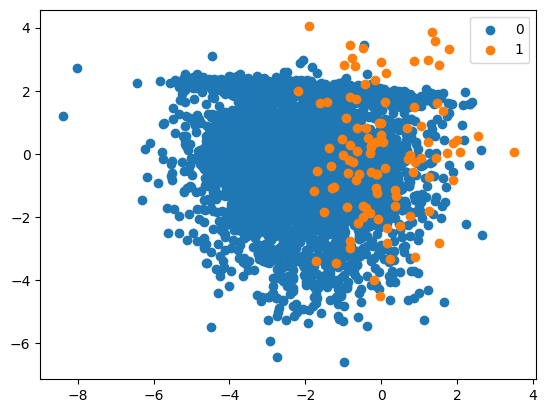

In [3]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
print(f"trainX: {trainX}, trainy: {trainy}")

y = trainy + testy
X = trainX + testX
# summarize class distribution
counter = Counter(trainy + testy)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [4]:

# get the model
n_input = trainX.shape[1]
model = define_model(n_input)
# fit model
weights = {0:1, 1:100}
history = model.fit(trainX, trainy, class_weight=weights, epochs=100, verbose=0)
# evaluate model
yhat = model.predict(testX)
print(yhat)


157/157 [==============================] - 0s 1ms/step
[[0.02312038]
 [0.04288062]
 [0.0745853 ]
 ...
 [0.0056737 ]
 [0.00204278]
 [0.0204679 ]]


In [5]:
print(testy)

[0 0 0 ... 0 0 0]


In [ ]:
score = roc_auc_score(testy, yhat)
print('ROC AUC: %.3f' % score)

In [2]:
print(f"trainX: {trainX.shape}, trainy: {trainy.shape}")

trainX: (5000, 2), trainy: (5000,)
